## Flight Data Analysis

### Step-by-step

- Importing libraries needed
- Loading dataset
- Data Overview
- Data Cleansing
- Descriptive and Exploratory Data Analysis

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load in 

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.

# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("E:/Data Set/"))

# Any results you write to the current directory are saved as output.

['2008.csv']


### Importing Liabraries

In [7]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Loading DataSet

In [8]:
data = pd.read_csv('E:/Data Set/2008.csv')

### Data Overview

In [6]:
data.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [9]:
data.shape

(7009728, 29)

### Data Cleaning

###### Missing Value Check

In [10]:
## Checking Missing Values

missing_data = data.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(data.shape[0]-missing_data['missing values'])/data.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,CancellationCode,6872294,1.960618
1,LateAircraftDelay,5484993,21.751700
2,NASDelay,5484993,21.751700
3,WeatherDelay,5484993,21.751700
4,CarrierDelay,5484993,21.751700
5,SecurityDelay,5484993,21.751700
6,AirTime,154699,97.793081
7,ActualElapsedTime,154699,97.793081
8,ArrDelay,154699,97.793081
9,ArrTime,151649,97.836592


###### Date and Time Extraction

In [12]:
data['Date'] = pd.to_datetime(data.Year.map(str)+'-'+data.Month.map(str)+'-'+data.DayofMonth.map(str))

In [ ]:
# Function that convert the 'HHMM' string to datetime.time

def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure

In [ ]:
# Function that combines a date and time to produce a datetime.datetime

def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])

In [ ]:
# Function that combine two columns of the dataframe to create a datetime format

def create_flight_time(data, col):    
    liste = []
    for index, cols in data[['Date', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)

In [ ]:
data['CRSDepTime'] = create_flight_time(data, 'CRSDepTime')
data['DepTime'] = data['DepTime'].apply(format_heure)
data['CRSArrTime'] = data['CRSArrTime'].apply(format_heure)
data['ArrTime'] = data['ArrTime'].apply(format_heure)

In [17]:
data.loc[:5, ['CRSDepTime', 'CRSArrTime', 'DepTime',
             'ArrTime', 'DepDelay', 'ArrDelay']]

,CRSDepTime,CRSArrTime,DepTime,ArrTime,DepDelay,ArrDelay
0,1955,2225,2003.0,2211.0,8.0,-14.0
1,735,1000,754.0,1002.0,19.0,2.0
2,620,750,628.0,804.0,8.0,14.0
3,930,1100,926.0,1054.0,-4.0,-6.0
4,1755,1925,1829.0,1959.0,34.0,34.0
5,1915,2110,1940.0,2121.0,25.0,11.0


### Descriptive and Exploratory Data Analysis

###### Carriers' Delay Profile

In [18]:
# Extracting statistical parameters from a groupby object:

def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [19]:
# Dataframe creation with statitical infos on each airline:

global_stats = data['DepDelay'].groupby(data['UniqueCarrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
UniqueCarrier,,,,
AQ,-61.0,336.0,7758.0,-1.397783
HA,-534.0,963.0,61263.0,0.455201
F9,-25.0,817.0,95462.0,5.919602
AS,-79.0,947.0,148984.0,6.848722
OH,-70.0,960.0,191173.0,11.536153
B6,-70.0,976.0,192903.0,12.653396
YV,-92.0,607.0,245824.0,12.000675
9E,-54.0,1127.0,255223.0,6.765860
FL,-62.0,1206.0,259458.0,9.262713


###### Carriers' Delay Categorization (on time, small delay, large delay)

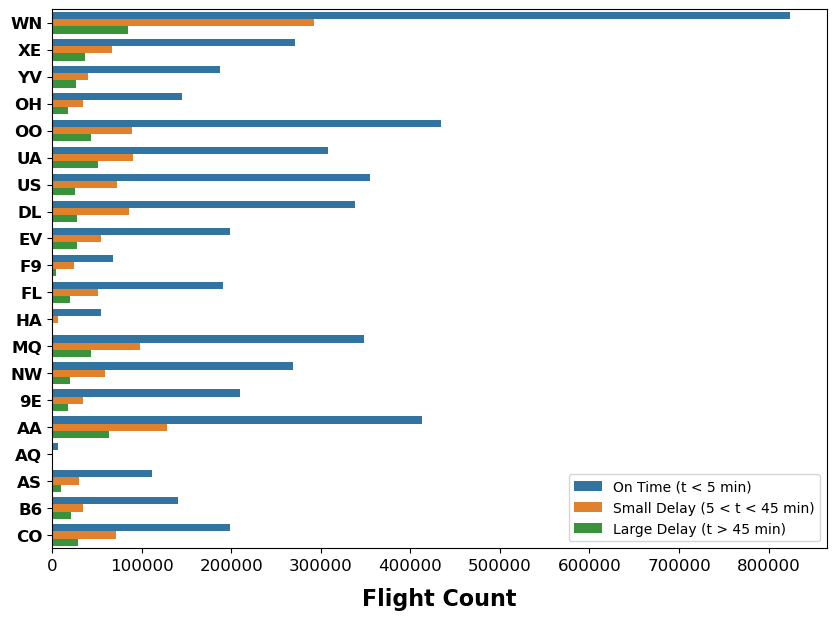

In [36]:
# Grouping the delays

delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
data['DelayLvl'] = data['DepDelay'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="UniqueCarrier", hue='DelayLvl', data=data)

# Setting Labels

plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight Count', fontsize=16, weight = 'bold', labelpad=10)

# Setting Legends

L = plt.legend()
L.get_texts()[0].set_text('On Time (t < 5 min)')
L.get_texts()[1].set_text('Small Delay (5 < t < 45 min)')
L.get_texts()[2].set_text('Large Delay (t > 45 min)')
plt.show()

###### The End